In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Ravencoin.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1193 non-null   object 
 1   Open        1193 non-null   float64
 2   High        1193 non-null   float64
 3   Low         1193 non-null   float64
 4   Close       1193 non-null   float64
 5   Volume      1193 non-null   float64
 6   Market Cap  1193 non-null   float64
dtypes: float64(6), object(1)
memory usage: 65.4+ KB


In [4]:
df.drop(['Date'],axis=1,inplace=True)

In [5]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
0,0.075036,0.078426,0.041742,0.076788,52893971.50,6.905278e+08
1,0.069519,0.076493,0.068954,0.075071,76978988.82,6.744868e+08
2,0.071026,0.075444,0.065501,0.069470,79818314.42,6.237228e+08


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1193.000000,1193.000000,1193.000000,1193.000000,1.193000e+03,1.193000e+03
mean,0.039797,0.042429,0.037410,0.039829,4.056414e+07,2.284285e+08
std,0.043003,0.046982,0.040110,0.043026,1.461692e+08,3.859071e+08
min,0.010102,0.010386,0.008794,0.009998,9.170060e+04,0.000000e+00
25%,0.016558,0.017477,0.015867,0.016558,3.769563e+06,4.274268e+07
50%,0.024123,0.025255,0.022959,0.024183,1.057018e+07,1.208226e+08
75%,0.041445,0.043642,0.038185,0.041351,2.242940e+07,1.657777e+08
max,0.234745,0.285421,0.212904,0.235932,3.244344e+09,2.018789e+09


In [8]:
df.shape

(1193, 6)

In [9]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

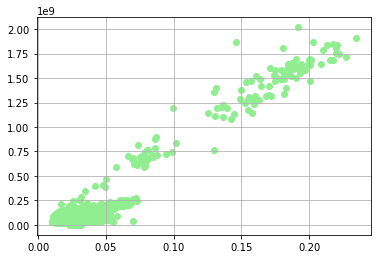

In [12]:
plt.scatter(df['Open'], df['Market Cap'], color='lightgreen')
plt.grid(True)
plt.show()

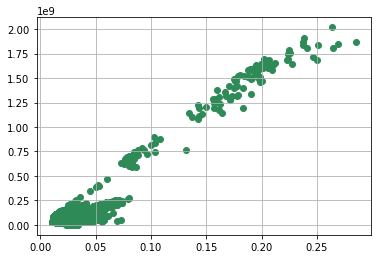

In [13]:
plt.scatter(df['High'], df['Market Cap'], color='seagreen')
plt.grid(True)
plt.show()

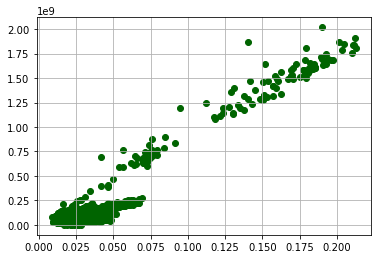

In [14]:
plt.scatter(df['Low'], df['Market Cap'], color='darkgreen')
plt.grid(True)
plt.show()

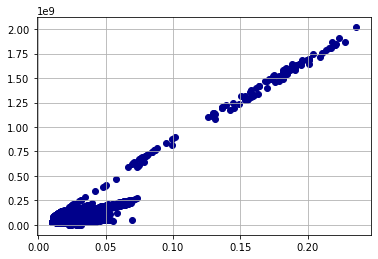

In [16]:
plt.scatter(df['Close'], df['Market Cap'], color='darkblue')
plt.grid(True)
plt.show()

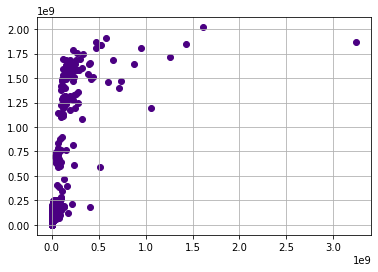

In [17]:
plt.scatter(df['Volume'], df['Market Cap'], color='indigo')
plt.grid(True)
plt.show()

In [18]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [19]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [20]:
print(utils.multiclass.type_of_target(y))

continuous


In [21]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [22]:
print(utils.multiclass.type_of_target(encoded))

multiclass


In [23]:
model1 =  LinearRegression()

In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(X) 

In [25]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [26]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.3719019089830542]

In [27]:
y_pred1 = model1.predict(X_test)

In [28]:
df2=pd.DataFrame({'Predicted values':y_pred1,'Actual values':encoded_test})
df2

,Predicted values,Actual values
0,455.215263,335
1,1423.746751,1151
2,495.408328,179
3,454.149367,442
4,797.784225,1074
...,...,...
353,731.828148,1014
354,576.237871,339
355,501.102348,838
356,730.441001,1031


In [29]:
import pickle
pkl_file= open('Ravencoin.pkl',"wb")
pickle.dump(model1,pkl_file)
pkl_file.close()

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [31]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 588.0301760268231
Coefficients: 
 [ 110.54063764 -497.0280572    27.18914781  563.75088034   17.47549196]


In [32]:
X = sm.add_constant(X)

In [33]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [34]:
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     159.8
Date:                Fri, 25 Jun 2021   Prob (F-statistic):          5.87e-130
Time:                        16:34:04   Log-Likelihood:                -8354.8
No. Observations:                1193   AIC:                         1.672e+04
Df Residuals:                    1187   BIC:                         1.675e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        588.0302      7.727     76.106      0.0

In [35]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [36]:
y_pred = model.predict(X_test)

In [37]:
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
0,538.720729,860
1,853.135016,1087
2,508.230080,849
3,501.566441,662
4,721.852737,1050
...,...,...
353,646.896325,934
354,478.462591,566
355,546.554323,768
356,1387.470931,1172
